# KNN

## Configuraciones iniciales


Cargamos las bibliotecas que se van a estar usando a lo largo de este notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold, StratifiedKFold

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from preprocessing import prepararSetDeDatos
from preprocessing import knnPreprocessing

## Carga y preparacion del set de datos

In [5]:
y = pd.read_csv('Datasets/tp-2020-2c-train-cols1.csv')

In [6]:
X = pd.read_csv('Datasets/tp-2020-2c-train-cols2.csv')

In [7]:
X,y = prepararSetDeDatos(X,y)

## Funciones auxiliares

In [8]:
def obtenerMejorK(datosPreprocesados):
    mejor_valor = 0
    mejor_k = None
    y_array=np.array(y)
    for k in [2,3,4,5,6,7,8,9,10,15,20,25,30]:
        kf = StratifiedKFold(n_splits=8)
        metricas = []
        for fold_idx, (train_index, test_index) in enumerate(kf.split(datosPreprocesados, y_array)):
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(datosPreprocesados[train_index], y_array[train_index].ravel())
            predicciones = knn.predict(datosPreprocesados[test_index])
            score_obtenida = roc_auc_score(y_array[test_index],predicciones)
            metricas.append(score_obtenida)

        if np.mean(metricas) >= mejor_valor:
            mejor_valor = np.mean(metricas)
            mejor_k = k
            
    return mejor_valor, mejor_k    

## KNN

In [9]:
X_knn = knnPreprocessing(X)

[[73.  0.  0.  1.]
 [35.  1.  1.  2.]
 [32.  0.  0.  3.]
 ...
 [38.  0.  0.  1.]
 [24.  0.  0.  2.]
 [32.  0.  0.  1.]]
----------ESPACIO----------
[[0. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 1. 0.]]


In [11]:
mejor_valor, mejor_k = obtenerMejorK(X_knn)

In [12]:
print(mejor_valor.round(3))
print(mejor_k)

0.741
3


In [13]:
knn = KNeighborsClassifier(n_neighbors=mejor_k)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_knn, y, test_size=0.25, random_state=0)

In [15]:
knn.fit(X_train, y_train)

<ipython-input-15-144fd69ce732>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred = knn.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred, target_names=['No vuelve','Vuelve']))

              precision    recall  f1-score   support

   No vuelve       0.74      0.83      0.79       121
      Vuelve       0.69      0.56      0.62        80

    accuracy                           0.73       201
   macro avg       0.72      0.70      0.70       201
weighted avg       0.72      0.73      0.72       201



In [18]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

Text(45.72222222222221, 0.5, 'Real')

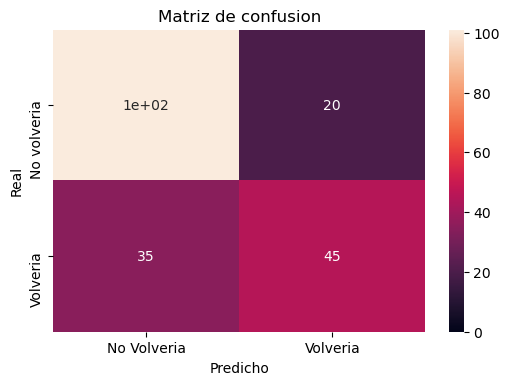

In [19]:
fig, ax = plt.subplots(dpi=100)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, vmin = 0, yticklabels=["No volveria","Volveria"], xticklabels=[ "No Volveria","Volveria"], ax=ax)
ax.set_title("Matriz de confusion")
ax.set_xlabel("Predicho")
ax.set_ylabel("Real")

EXPLICACION???????

Graficamos ahora la curva ROC para ambos casos.

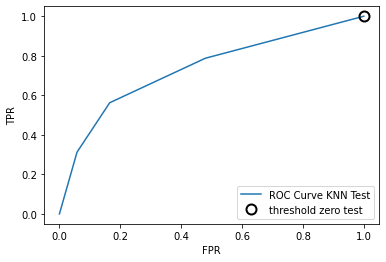

In [20]:
fpr_knn_test,tpr_knn_test,thresholds_knn_test = roc_curve(y_test,knn.predict_proba(X_test)[:,1])

zero_test = np.argmin(np.abs(thresholds_knn_test))

plt.plot(fpr_knn_test,tpr_knn_test,label="ROC Curve KNN Test")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr_knn_test[zero_test],tpr_knn_test[zero_test],'o',markersize=10,label="threshold zero test",fillstyle="none",c="k",mew=2)

plt.legend(loc=4)
plt.show()

EXPLICACION??????

In [21]:
auc_knn = roc_auc_score(y_test,knn.predict_proba(X_test)[:, 1])
print("AUC para KNN: {:.3f}".format(auc_knn))

AUC para KNN: 0.733


## Conclusiones KNN